# Deutsch Algorithm

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

Let us first generate the gate for function f. Since the function takes 1-bits input and outputs 1-bits, only 4 such functions are possible - constant functions 0 and 1, the identity function and the NOT function.

In [9]:
def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit

    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

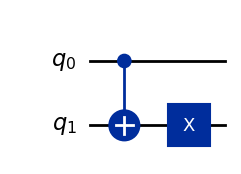

In [10]:
display(deutsch_function(3).draw(output="mpl"))

Now, we will create the circuit that implements the Deutsch algorithm.

In [19]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

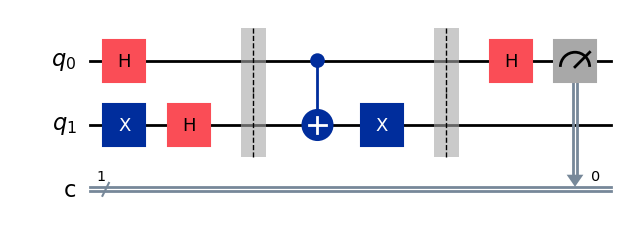

In [20]:
display(compile_circuit(deutsch_function(3)).draw(output="mpl"))

Now, let us create a function which implements the Deutsch algorithm on a given function f, and outputs whether f is constant or balanced. We proceed to check our algorithm for all four possible f.

In [11]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

In [18]:
for i in range(1,5):
    f = deutsch_function(i)
    print(f"The function {i} is: {deutsch_algorithm(f)}")

The function 1 is: constant
The function 2 is: balanced
The function 3 is: balanced
The function 4 is: constant


We can see that the algorithm is working properly!